In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
pd.read_csv('datadump_s5-000.csv')

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,...,Vertical,None,Compensator,5.7_USG,Pistols,None,None,None,None,IMPACT_GRENADE
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,...,None,None,None,MK1_9mm,Pistols,None,None,None,None,DEPLOYABLE_SHIELD
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,None,None,MuzzleBrake,PRB92,Pistols,None,None,None,None,IMPACT_GRENADE
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE_SHIELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,20170221,PS4,HOSTAGE,BANK,1368316041,6,STAFF_ROOM,Defender,AttackersEliminated,158,...,Vertical,None,None,BEARING_9,Submachine_Guns,RedDot,None,None,None,CLAYMORE
3999996,20170221,PS4,HOSTAGE,BANK,1368316041,2,VAULT,Attacker,DefendersEliminated,170,...,Vertical,None,None,BEARING_9,Submachine_Guns,RedDot,None,None,None,CLAYMORE
3999997,20170221,PS4,HOSTAGE,BANK,1368316041,1,VAULT,Attacker,DefendersEliminated,142,...,Vertical,None,MuzzleBrake,M45_MEUSOC,Pistols,None,None,Laser,Suppressor,SMOKE_GRENADE
3999998,20170221,PS4,HOSTAGE,BANK,1368316041,4,VAULT,Defender,AttackersEliminated,156,...,Vertical,None,Compensator,P9,Pistols,None,None,None,None,BREACH_CHARGE


In [4]:
df = pd.read_csv('datadump_s5-000.csv')
df = df.drop(['endroundreason','dateid','roundduration','clearancelevel','skillrank','role','team','haswon','nbkills','isdead','primaryweapon','primaryweapontype','primarysight','primarygrip','primaryunderbarrel','primarybarrel','secondaryweapon','secondaryweapontype','secondarysight','secondarygrip','secondaryunderbarrel','secondarybarrel','secondarygadget','platform','matchid'], axis=1, errors='ignore')
df.head()

,gamemode,mapname,roundnumber,objectivelocation,winrole,operator
0,HOSTAGE,CLUB_HOUSE,1,STRIP_CLUB,Defender,SWAT-CASTLE
1,HOSTAGE,CLUB_HOUSE,4,CHURCH,Defender,GSG9-JAGER
2,HOSTAGE,CLUB_HOUSE,3,CHURCH,Defender,JTF2-FROST
3,HOSTAGE,CLUB_HOUSE,4,CHURCH,Defender,BOPE-CAVEIRA
4,HOSTAGE,CLUB_HOUSE,6,BEDROOM,Attacker,GSG9-JAGER


In [5]:
# Encode categorical variables
label_encoders = {}
columns_to_encode = ['gamemode', 'mapname', 'objectivelocation', 'winrole', 'operator']
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [6]:
# Split data into features and target variable
X = df[['gamemode', 'mapname', 'objectivelocation', 'roundnumber', 'winrole']]
y = df['operator']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

In [9]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.0637675

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     14150
           1       0.04      0.00      0.01     32580
           2       0.05      0.02      0.03     41029
           3       0.04      0.01      0.01     35066
           4       0.01      0.00      0.00     22512
           5       0.01      0.00      0.00     12925
           6       1.00      0.00      0.00      1298
           7       0.04      0.00      0.00     28680
           8       0.04      0.02      0.02     40648
           9       0.06      0.04      0.05     38005
          10       1.00      0.00      0.00      4527
          11       0.00      0.00      0.00     12989
          12       0.07      0.60      0.12     52913
          13       1.00      0.00      0.00      3978
          14       0.00      0.00      0.00     18768
          15       0.04      0.00      0.00     26045
          16       0.00      0.00   

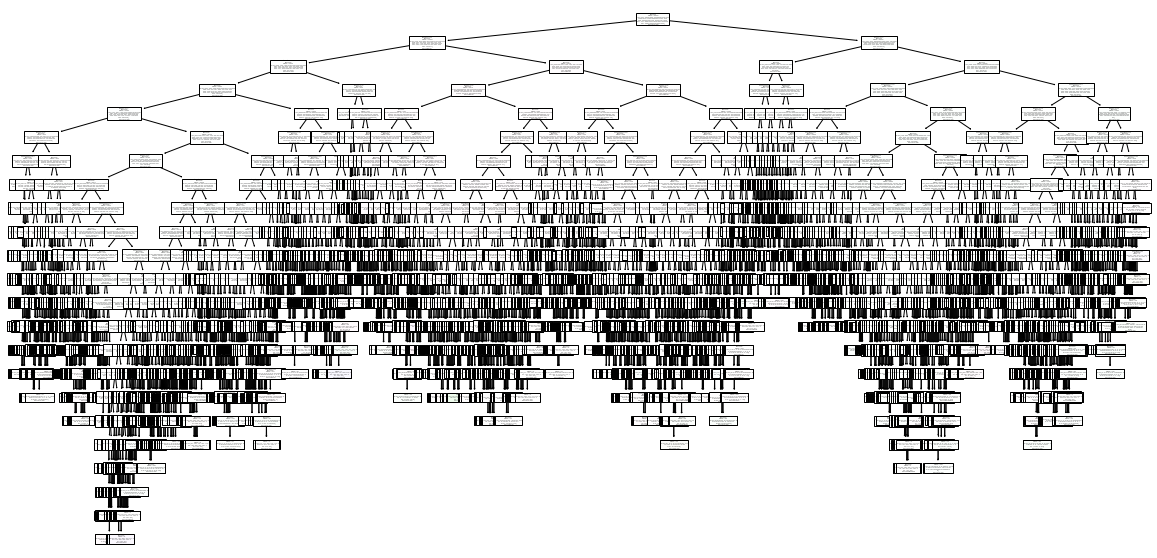

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['operator'].classes_)
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

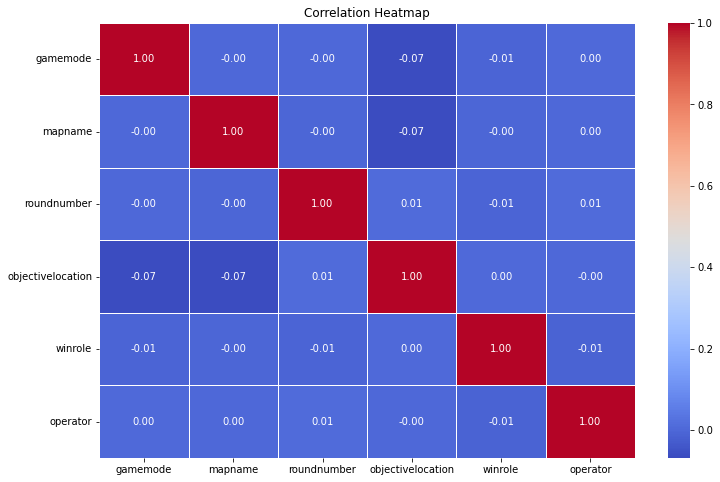

In [15]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()